In [1]:
library(SVbyEye)
library(stringr)
library(ggplot2)
library(dplyr)
# args <- commandArgs(trailingOnly = TRUE)

Warning message:
“package ‘stringr’ was built under R version 4.3.2”
Warning message:
“package ‘dplyr’ was built under R version 4.3.2”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [18]:
paf.file = "/vf/users/Phillippy/projects/giraffeT2T/assembly/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet/giraffe_v0.1.1.query_giraffe.0.50k.mashmap"
paf.file = "/vf/users/Phillippy/projects/giraffeT2T/assembly/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet/giraffe_v0.1.1.query_ARS-UCD20.50k.mashmap"
# paf.file = "/vf/users/Phillippy/projects/giraffeT2T/assembly/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet_polishing/giraffe_v0.1.1.query_giraffeRef.50k.mashmap"
minlen = 5000000
# outPrefix = "/vf/users/Phillippy/projects/giraffeT2T/assembly/verkko2.2_hifi-duplex_trio-hic/verkko-thic_v0.1.0_verkko_fillet/assembly.mashmap.rename.out_syntenic"

In [19]:
paf.table <- read.csv(paf.file, header = FALSE, sep = '\t')
paf.table <- paf.table[c('V1','V2','V3','V4','V5','V6','V7','V8','V9','V11','V11','V12')]
colnames(paf.table) <- c('q.name','q.len','q.start','q.end','strand','t.name','t.len','t.start','t.end','n.match','aln.len','mapq')
# head(paf.table,6)

In [20]:
head(paf.table,6)

,q.name,q.len,q.start,q.end,strand,t.name,t.len,t.start,t.end,n.match,aln.len,mapq
,<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
1,NC_037328.1,158534110,150000,200000,-,chr1_mat,227001041,116448700,116498700,50000,50000,8
2,NC_037328.1,158534110,150000,200000,-,chr1_pat,230818157,120957931,121007931,50000,50000,8
3,NC_037328.1,158534110,200000,300000,-,chr13_mat,124363021,62814577,62900214,100000,100000,9
4,NC_037328.1,158534110,200000,300000,-,chr13_pat,123819179,62819970,62905671,100000,100000,9
5,NC_037328.1,158534110,250000,300000,-,chr13_mat,124363021,69224516,69274516,50000,50000,9
6,NC_037328.1,158534110,250000,300000,-,chr13_pat,123819179,69252321,69302321,50000,50000,9


In [21]:
# Filter for rows where 'q.name' ends with "dam"
paf.table_dam <- paf.table[str_ends(paf.table$t.name, "mat"), ] %>%
  filter(!grepl("chrY", q.name, ignore.case = TRUE)) 

# Filter for rows where 'q.name' ends with "sire"
paf.table_sire <- paf.table[str_ends(paf.table$t.name, "pat"), ] %>%
  filter(!grepl("chrX", q.name, ignore.case = TRUE))

In [22]:
dim(paf.table_sire)

[1] 1986   12

In [23]:
dim(paf.table_dam)

[1] 2588   12

In [24]:
options(repr.plot.width=10, repr.plot.height=10)

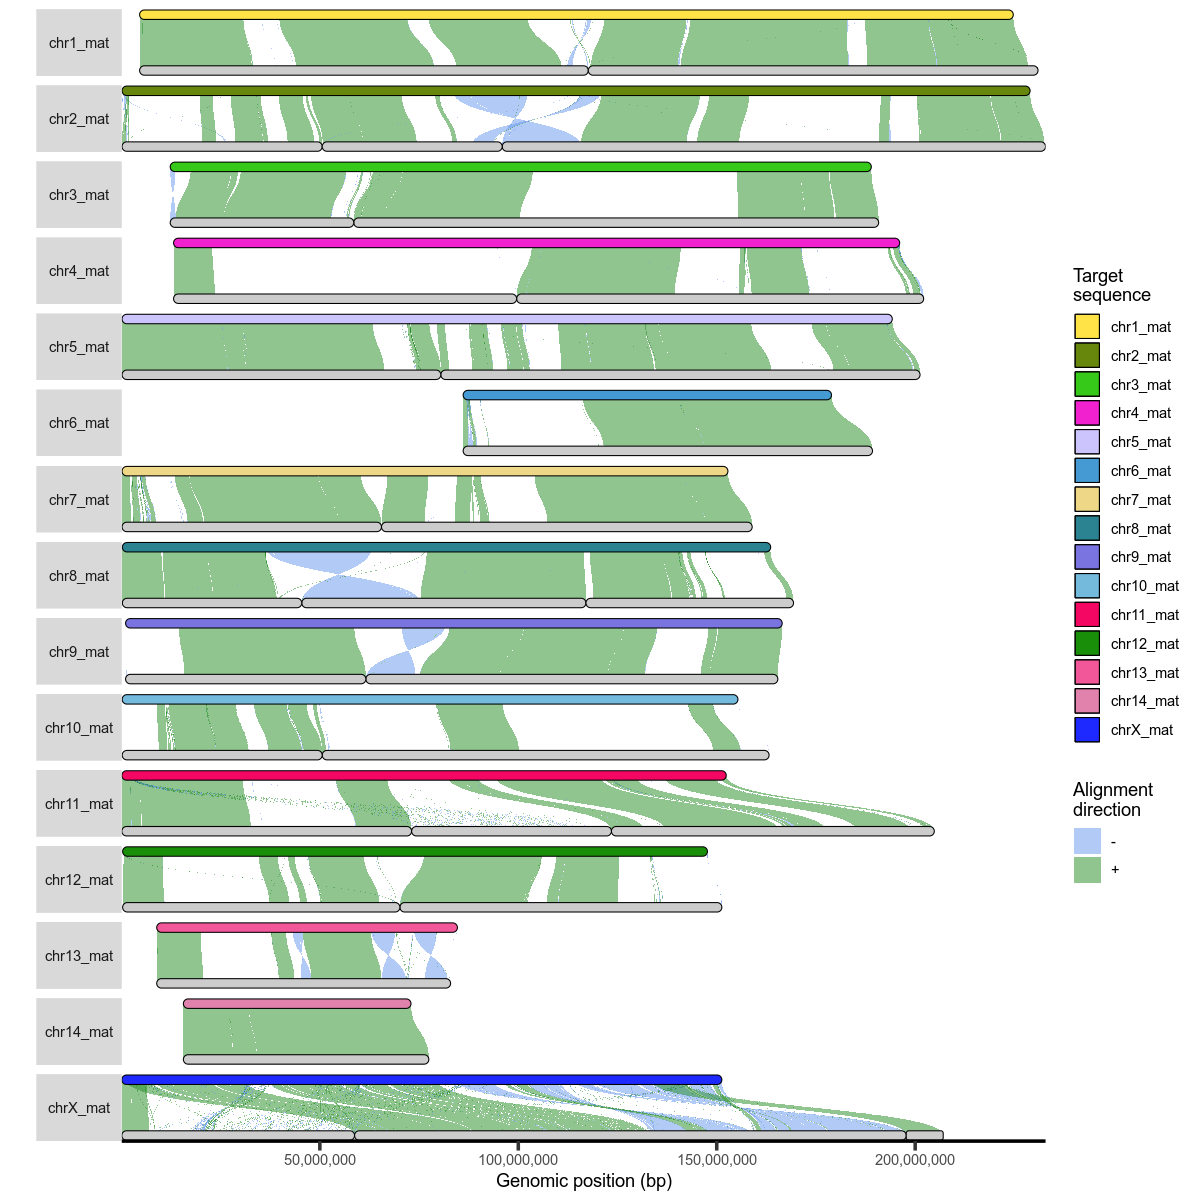

In [25]:
plotGenome(paf.table = paf.table_dam, 
           # chromosomes = paste0('chr', c(8,13, 5, 9, 12)), 
           #chromosome.bar.width = grid::unit(2, 'mm'), 
           min.query.aligned.bp = minlen,
          )

# ggsave(filename = paste0(outPrefix,"_sire.png"))

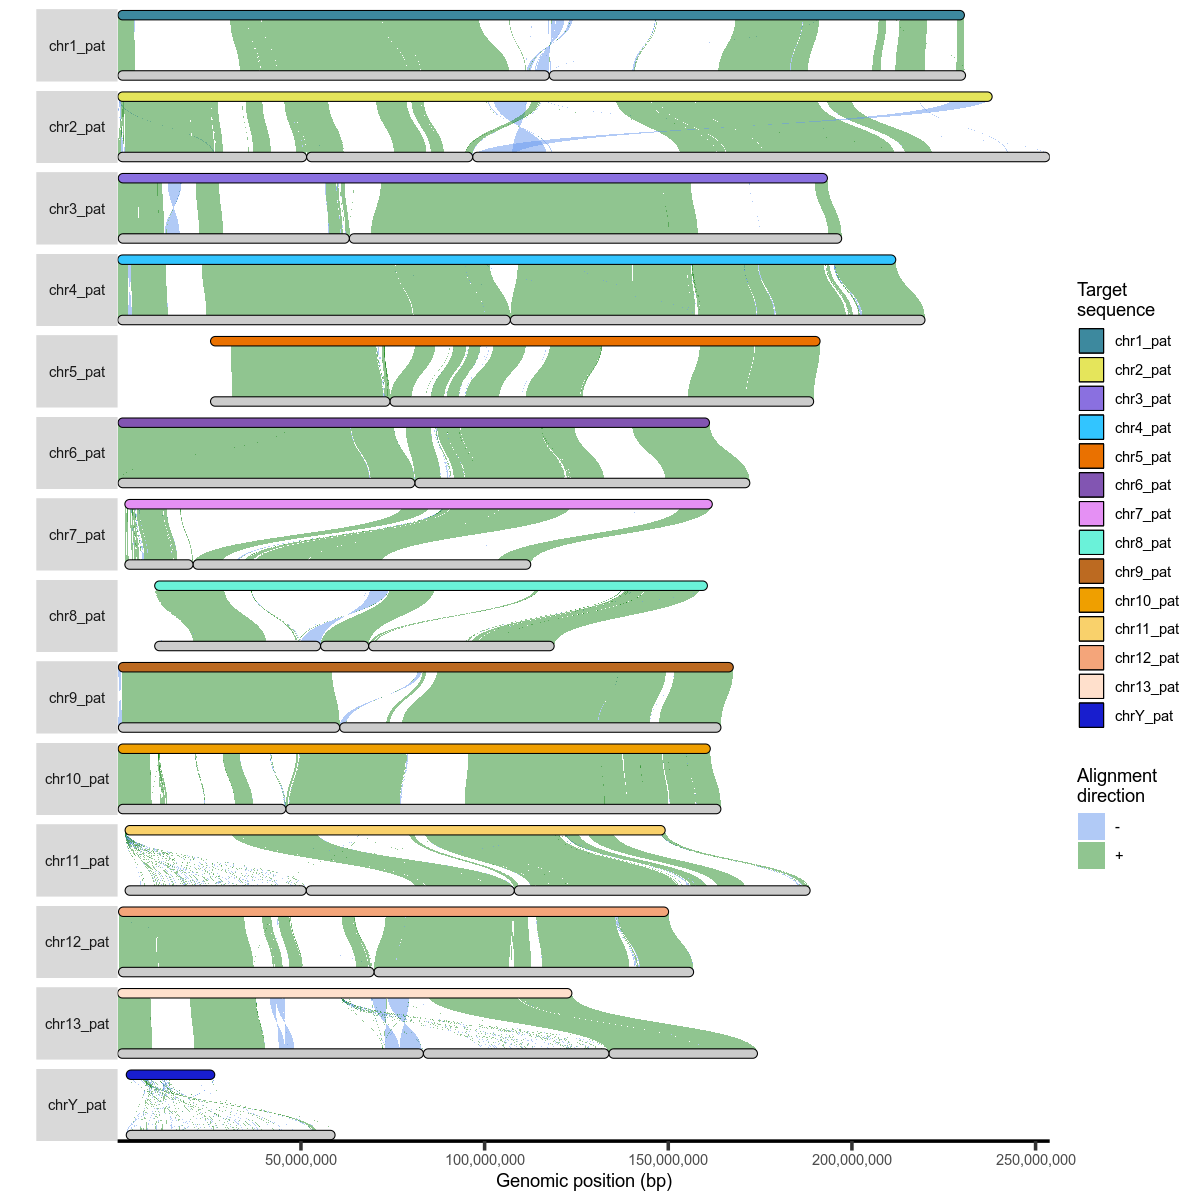

In [26]:
plotGenome(paf.table = paf.table_sire, 
           # chromosomes = paste0('chr', c(8,13, 5, 9, 12)), 
           #chromosome.bar.width = grid::unit(2, 'mm'), 
          min.query.aligned.bp = minlen,
          )
# ggsave(filename = paste0(outPrefix,"_dam.png"))

In [27]:
contig = "chr9_pat"
minlen_a= 500000

In [28]:
# Filter rows based on a condition
filtered_table <- paf.table[paf.table$n.match > minlen_a, ]
# filtered_table <- paf.table

result <- filtered_table %>%
  group_by(q.name, t.name, strand) %>%
  summarise(total_match = sum(n.match, na.rm = TRUE)) %>%
    arrange(t.name)
result <- result[result$total_match > minlen_a, ]
result[result$t.name == contig,]

`summarise()` has grouped output by 'q.name', 't.name'. You can override using the `.groups` argument.


q.name,t.name,strand,total_match
<chr>,<chr>,<chr>,<int>
NC_037336.1,chr9_pat,+,85200000
NC_037336.1,chr9_pat,-,1550000
NC_037349.1,chr9_pat,+,59250000
NC_037349.1,chr9_pat,-,1000000


In [29]:
paf.table[(paf.table$t.name == contig) & (paf.table$aln.len > minlen_a), ] %>%
  arrange(t.start)

q.name,q.len,q.start,q.end,strand,t.name,t.len,t.start,t.end,n.match,aln.len,mapq
<chr>,<int>,<int>,<int>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>
NC_037349.1,60773035,450000,1450000,-,chr9_pat,167853759,288475,1080424,1000000,1000000,10
NC_037349.1,60773035,1450000,60700000,+,chr9_pat,167853759,1397119,58428871,59250000,59250000,11
NC_037336.1,105454467,350000,1900000,-,chr9_pat,167853759,81961829,83161587,1550000,1550000,10
NC_037336.1,105454467,12900000,13900000,+,chr9_pat,167853759,83242584,84217498,1000000,1000000,11
NC_037336.1,105454467,17250000,70550000,+,chr9_pat,167853759,87126574,136460449,53300000,53300000,12
NC_037336.1,105454467,70700000,84700000,+,chr9_pat,167853759,136425432,149400834,14000000,14000000,12
NC_037336.1,105454467,87250000,104150000,+,chr9_pat,167853759,151684073,167708175,16900000,16900000,11


In [61]:
cen_bed="/vf/users/Phillippy/projects/giraffeT2T/assembly/ncbiRef/cattle/GCF_002263795.3_ARS-UCD2.0_assembly_cen.bed"
cen = read.csv(cen_bed, header = FALSE, sep = '\t')
colnames(cen) <- c("chr",'start','end','cat','cen')
cen['len'] = cen['end'] - cen['start']
# head(cen)

In [62]:
cendb = cen %>% 
  group_by(chr, cat) %>%
  summarise(total_len = sum(len, na.rm = TRUE)) %>%
    arrange(chr)
# head(cendb)

`summarise()` has grouped output by 'chr'. You can override using the `.groups` argument.


In [63]:
chr_labels <- c(paste0("chr", 1:29), "chrX", "chrY")
cendb$chr = factor(cendb$chr, levels = chr_labels, ordered = TRUE)

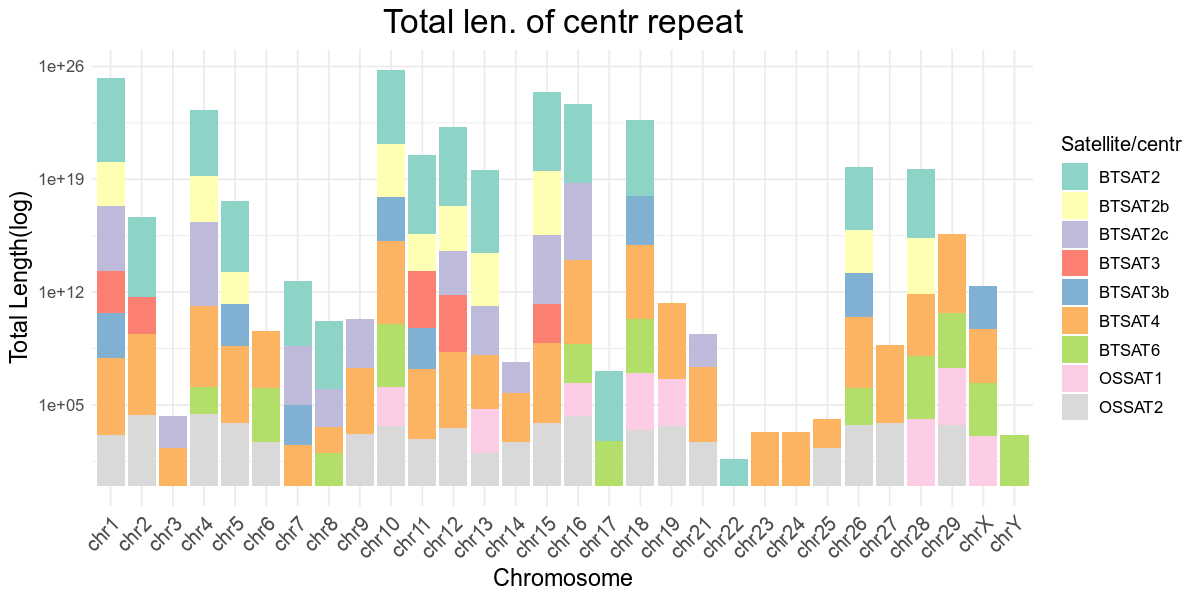

In [18]:
options(repr.plot.width=10, repr.plot.height=5)


ggplot(cendb, aes(x = chr, y = total_len, fill = cat)) +
theme_minimal() +
  geom_bar(stat = "identity") +
    theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),  # X-axis text size
    axis.text.y = element_text(size = 10),                        # Y-axis text size
    axis.title.x = element_text(size = 14),                       # X-axis title size
    axis.title.y = element_text(size = 14),                       # Y-axis title size
    plot.title = element_text(size = 20, hjust = .5),          # Plot title size
    legend.text = element_text(size = 10),                        # Legend text size
    legend.title = element_text(size = 12)                        # Legend title size
  ) +
  scale_fill_brewer(palette = "Set3") +
scale_y_log10() + 
  labs(title = "Total len. of centr repeat", x = "Chromosome", y = "Total Length(log)", fill = "Satellite/centr")


In [64]:
cendb_loc = cen %>% 
  group_by(chr) %>%
  summarise(start = min(start, na.rm = TRUE)) %>%
    arrange(start)
# head(cendb_loc)

In [65]:
fai <- read.csv("/vf/users/Phillippy/projects/giraffeT2T/assembly/ncbiRef/cattle/GCF_002263795.3_ARS-UCD2.0_genomic.fna.fai.len",
                header = FALSE, sep = '\t',
                col.names = c("chr", "total_len"))
# fai

In [66]:
result <- merge(cendb_loc, fai, by = "chr")
result['ratio'] = result['start']/result['total_len']
# result

In [67]:
# result$chr = factor(result$chr, order = TRUE, level = result$chr)

chr_labels <- c(paste0("chr", 1:29), "chrX", "chrY")
result$chr = factor(result$chr, order = TRUE, level = chr_labels)

In [68]:
result

chr,start,total_len,ratio
<ord>,<int>,<int>,<dbl>
chr1,2,158534110,1.261558e-08
chr10,269,103308737,2.603846e-06
chr11,1,106982474,9.347325e-09
chr12,14,87216183,1.605207e-07
chr13,157,83472345,1.880862e-06
chr14,18041,82403003,2.189362e-04
chr15,48,85007780,5.646542e-07
chr16,1,81013979,1.234355e-08
chr17,4,73167244,5.466927e-08


`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


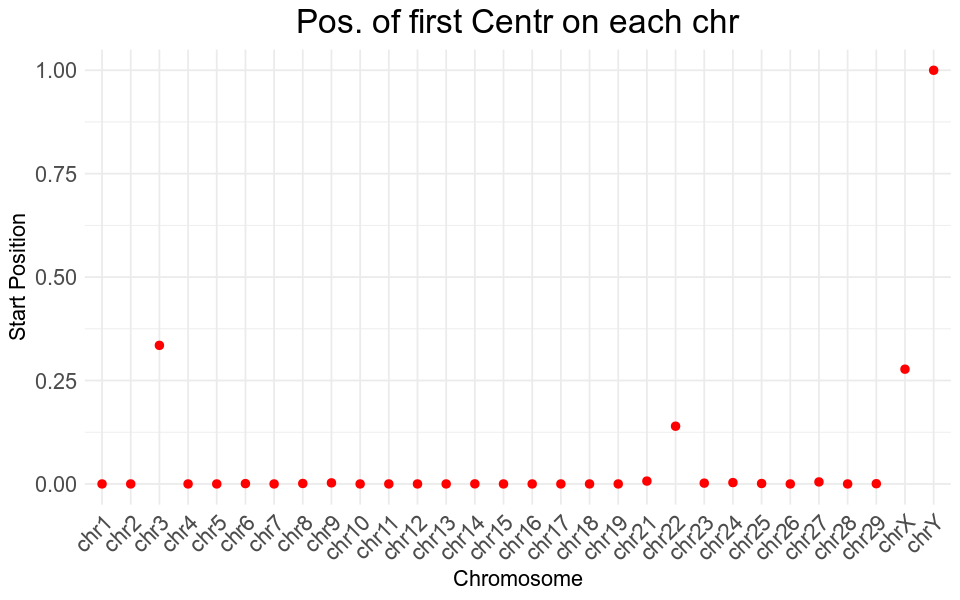

In [47]:
options(repr.plot.width=8, repr.plot.height=5)

ggplot(data = result, aes(x = chr, y = ratio)) +
  geom_line(color = "blue", size = 1) +       # Add a line with color and size
  geom_point(color = "red", size = 2) +      # Add points with color and size
  theme_minimal() +
  theme(
    axis.text.x = element_text(size = 13, angle = 45, hjust = 1),  # Rotate and style x-axis labels
    axis.text.y = element_text(size = 13),                        # Style y-axis labels
    axis.title.x = element_text(size = 13),                       # Style x-axis title
    axis.title.y = element_text(size = 13),                       # Style y-axis title
    plot.title = element_text(size = 20, , hjust = 0.5)  # Center and enlarge the title
  ) +
  labs(
    title = "Pos. of first Centr on each chr",
    x = "Chromosome",
    y = "Start Position"
  )
